# Formal Grammars 

In [135]:
from numpy.random import choice

## Using dictionaries

One simple and intuitive way of implementing a grammar in python is as a dictionary:
- The keys are the left hand side rules 
- The values are lists containing the possible strings that can be substituted by the key

> __NOTE__: To see why we need to use lists as values rather than using a different key for each rule, try to repeat the same key more than once. What happens?

For instance, let's write the grammar with the following rules:
$$
S \rightarrow aS | bS | \epsilon
$$

In [129]:
grammar = {
    'S': [
        'aS', 
        'bS', 
        ''
    ]
}

One thing we can do with this way of defining grammars is writing a function that randomly applies rule until we get to a string consisting only of terminals:

In [134]:
# always start with the starting symbol
current_sentence = 'S'
# while there is a non-terminal in the sentence
while 'S' in current_sentence:
    # substitute the first occurrence of S
    # with a randomly chosen substitution rule
    current_sentence = current_sentence.replace(
        'S', 
        choice((grammar['S'])),
        # NOTE: in this particular case there will always
        # only be one S, but this is not true for 
        # all grammars!
        1
    )
print('String: ', current_sentence)

String:  abaaa


Write a function that takes a grammar, a set of terminals, and a set of nonterminals, and determines where the grammar is in the Chomsky hierarchy (Spend about 20 minutes on this - if you see that you can do it, leave it!):

In [ ]:
# Your function here




## A new piece of python syntax: generators

Before we move onto defining classes to model grammars, which allow richer structures than dictionaries, we need to briefly talk about generators. A generator is basically _a function with a memory_, which can return multiple things in succession. Suppose you have a generator called `gen`. A typical use case is to use it in a construction like `for i in gen():`, where `i` will take on in succession the values returned by the generator.

The definition is almost like a function, except generators have the keyword `yield` where functions have `return`, and the execution doesn't stop at the return but can continue as long as future yield are possible.

The simple example is a generator that first yields (returns) 1 and then 2:

In [136]:
def simple_generator():
    # when getting things out of a generator,
    # the generator will return in the order
    # the yield statements are encountered
    
    # This is encountered first
    yield 1
    # Then this is encountered
    yield 2
    
for i in simple_generator():
    print(i)

1
2


A slightly more complex generator simply counts the odd integers starting with 1:

In [139]:
def odd_counter():
    i = 0
    while True:
        yield i*2+1
        i += 1

In [140]:
for i in odd_counter():
    if i <= 20:
        print(i, end=', ')
    else:
        break

1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 

Note that generators can also call themselves, like functions. Then we get recursive generators:

In [156]:
# Can you figure out what this generator does?
def recursive_gen(current_options, n):
    new_options = []
    for i in current_options:
        if sum(i) == n:
            yield i
        else:
            new_options.append(i+[1])
            new_options.append(i+[2])
    if all([sum(j)>n for j in new_options]):
        return 
    for i in recursive_gen(new_options, n):
        yield i

In [160]:
for i in recursive_gen([[1],[2],[3]], 6):
    print(i)

[2, 2, 2]
[3, 1, 2]
[3, 2, 1]
[1, 1, 2, 2]
[1, 2, 1, 2]
[1, 2, 2, 1]
[2, 1, 1, 2]
[2, 1, 2, 1]
[2, 2, 1, 1]
[3, 1, 1, 1]
[1, 1, 1, 1, 2]
[1, 1, 1, 2, 1]
[1, 1, 2, 1, 1]
[1, 2, 1, 1, 1]
[2, 1, 1, 1, 1]


Try to write the recursive_gen just as a normal function with `return` statements.

In [ ]:
# Your code here!




## Using classes

> __NOTE__: Before you work on the exercise in 'Defining a grammar class' please have a look at the rest of the notebook. This should give you an idea of what you need to do with that class, and therefore how to structure them internally.

### Defining a grammars class

Write a Grammar class to create context-free grammars. The `__init__` method should take a `start` argument with the starting nonterminal symbol.

The class should also have the following method (i.e., function):
- `add_rule`: add a rule to the grammar. The arguments of `add_rule` are: 
    1. The nonterminal on the left-hand side of the rule
    1. The string on the right side of the rule, containing `%s` wherever a non-terminal appears
    1. A list of non-terminal symbols, one for each `%s`, saying which non-terminals correspond to each %s.

In [ ]:
#### your class definition here!



Once this is defined, you should be able to run the following code to define the grammar for palindrome which we discussed in class:

```python
grammar = Grammar(start='S')

grammar.add_rule('S', 'a%sa', ['S'])
grammar.add_rule('S', 'b%sb', ['S'])
grammar.add_rule('S', '')
```

In [ ]:
#### Define the palindrome grammar here!



### Finding minimal formulas (more difficult!)

Now add another method `compute_first` to the class above which generates the `n` shortest strings in the language.

You should be able to run for instance (given the palindrome grammar above):

```python
grammar.compute_first(6)
```

Which should print out:

```python
aa
bb
aaaa
abba
baab
bbbb
```

> __HINT__: Think about this as exploring a tree (branches separating whenever more than one rule can be applied), and use the power of recursion to explore the tree. The recursive function can take a 'present' layer (the strings at the current nesting level) and progressively build the next layer by applying every rule to every sentence with nonterminals in the current layer, while yielding the sentences that only contain terminals. Then, yield the results of running the function on the next layer in a loop. 

In [68]:
#### Test compute_first here!

def enumerate_palindromes(layer):
    # your function here


def compute_first(n):
    for i, m in enumerate(enumerate_palindromes(['S'])):
        if i <= n:
            print(m)
        else:
            break

In [67]:
compute_first(4)


aa
bb
aaaa
abba


### Probabilistic context-free grammar

Expand the Grammar class once more so that `add_rule` takes one more argument: The (unnormalized) probability of applying the rule rather than the other rules with the same left-hand side.

The following code for instance redefines the palindrome grammar above but with probabilities:
```python
grammar = Grammar(start='S')

grammar.add_rule('S', 'a%sa', ['S'], 1)
grammar.add_rule('S', 'b%sb', ['S'], 1)
grammar.add_rule('S', '', 1)
```

In [ ]:
#### your class definition here!



Add a method `generate` to Grammar to generate a random string in the language by iteratively applying the rules according to the defined probabilities. The following code should run (but possibly give a different answer on different runs):

```python
grammar.generate()
```

printing e.g.,
```python
aabbaa
```

In [ ]:
#### Test generate here!



What happens when we increase...

- the probability of the rule $S \rightarrow aSa$?
- the probability of the rule $S \rightarrow bSb$?
- the probability of the rule $S \rightarrow \epsilon$?

# Formal semantics

In [1]:
!pip3 install ColabTurtlePlus

In [2]:
from numpy.random import choice
import numpy as np
import matplotlib.pyplot as plt
import re
from ColabTurtlePlus import Turtle as t
import IPython

Put clearscreen() as the first line in a cell (after the import command) to re-run turtle commands in the cell


In the past few weeks, we have set up a picture where the mind encodes categories and other stuff with a Language of Thought, we have seen how we can formally define languages, and we have explored how they can be interpreted. However, you might not have realized yet how powerful these methods are in what they can express. This week, we'll put it all together and see some case studies: a simple grammar for arithmetic, a grammar of shapes, and a grammar of sounds. 

Let's start by defining a couple of useful functions (can ignore them for now and have a look when you encounter them below):

In [3]:
def normalize(arr):
    # Transform the array so that it sums to 1
    return arr / np.sum(arr)


def apply_rule(match, grammar):
    """
    Accepts both PCFGs (where the keys of grammar
    are lists of tuples (unnormalized prob, right hand side)
    and CFGs (where the keys are lists of right hand side strings.
    """
    match_txt = grammar[match.group(0)]
    try:
        # if PCFG
        probs, subs = zip(*match_txt)
    except ValueError:
        # if CFG
        subs = match_txt
        probs = [1]*len(subs)
    sub = choice(subs, p=normalize(probs))
    return sub

## Basic arithmetic as a CFG

### A simple grammar

Before we get onto interpreting sentences from the grammar, we need a grammar to produce sentences with. For simplicity, we will encode the language as a dictionary. The keys are the left-hand side of substitution rules, the values a list of possible right-hand sides. 

> __NOTE__ We will put non-terminals between angle brackets, e.g. `'<S>'` to simplify parsing the strings.

Let's construct a very simple grammar:

In [381]:
CFG_arithmetic = {
    '<S>': ['plusOne(<S>)', 'one']
}

We will also need some way of generating random strings from the grammar:

In [4]:
def complete(sentence, grammar):
    # if there are still '<' that means there are still nonterminals
    while '<' in sentence:
        # substitute the first nonterminal applying 
        # one of the rules in the grammar
        sentence = re.sub(
            # Greedy search of an expression between
            # angle brackets.
            '<(.*?)>', 
            lambda match: apply_rule(match, grammar), 
            sentence
        )
    return sentence

So for example let's produce a random string:

In [371]:
complete('<S>', CFG_arithmetic)

'plusOne(plusOne(plusOne(plusOne(one))))'

Note that even though we have a sentence now and we have an _intuitive_ sense of what it could mean, we still need a way of implementing the interpretation in python. So let's do that!

### Interpreting the grammar

We will use $\lambda$ expressions to encode the meaning of our operators. Thankfully this is made quite easy by Python's lambda syntax, which we have seen a couple of weeks ago. We want to interpret the very simple arithmetic language defined above. We assume a type system with:
- One primitive type $n$, the type of integers.
- Function types defined inductively: $<\alpha, \beta>$ is the set of functions from things of type $\alpha$ to things of type $\beta$.

We can give meanings to all the terminals in our language. We do this in a dictionary: the keys are the terminals of our grammar and the values are the meanings, written as $\lambda$ expressions:

In [359]:
meanings = {
    # type n
    'one': 1,
    # type <n,n>
    'plusOne': lambda x: x+1
}

Our primitives can be applied to each other in a way consistent with their types:

In [360]:
# n to n
meanings['plusOne'](
    # n to n
    meanings['plusOne'](
        # n
        meanings['one']
    )
)

3

If the primitives in the language are defined, we can also write a string in the language as a python string, e.g., `'plusOne(one)'`. This is useful when e.g. building random strings from the language. However, we need a way to go from the string to the _interpreted_ string. For this, we exploit python's own interpreter via the keyword `eval`. Python's `eval` function plays the role of the interpretation function which we discussed in class, but it allows us to not take care of parsing brackets (going from a string to the underlying parse tree to interpret).

> __NOTE__ It is generally not recommended to use Python's `eval`. We will use it here only to evaluate sentences in our hand-made grammars, but never let it evaluate something you don't understand! We can pass `meanings` as the second argument of `eval` to tell it which symbols to interpret.

Let's see a simple example:

In [369]:
eval('plusOne(plusOne(one))', meanings)

3

Now we have a way of generating random strings from our gramnmar, as well as interpreting them. Therefore, we can study what happens when we produce a bunch of random strings. For instance, we can ask: what's the distribution of numbers produced by our PCFG?

In [335]:
# plot distribution of numbers obtained with this grammar
numbers = [
    eval(complete('<S>', CFG_arithmetic), meanings) 
    for _ in range(10000)
]

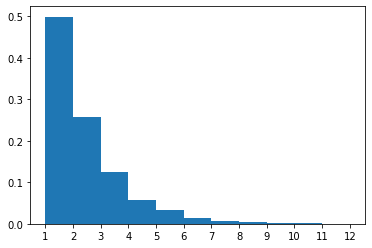

In [336]:
plt.hist(numbers, density=True, bins=np.arange(1,13))
plt.xticks(np.arange(1, 13))
plt.show()

Turns out the probability of each number $n$ is $2^{-n}$. Can you tell why?

### From a CFG to a PCFG

In practice, we'll mostly work with _probabilistic_ context free grammars. The idea here is that for each nonterminal we specify the probability of each possible substitution. A natural way of doing this here is, instead of having simply a list of possible substitutions as the value of the grammar dictionary, we have a list of tuples. The first element of each tuple is the (unnormalized) probability of that substitution rule, the second element is the actual right-hand side. 

Applying this to our simple arithmetic grammar above:

In [412]:
CFG_arithmetic = {
    '<S>': [
        (1, 'plusOne(<S>)'), 
        (1, 'one')
    ]
}

Our function `complete` still works, but now applies substitution rules with the given probabilities:

In [396]:
complete('<S>', CFG_arithmetic)

'plusOne(plusOne(plusOne(plusOne(one))))'

### Expanding the grammar

Our simple arithmetical grammar is cool and all, but extremely small. Let's enrich it slightly:

In [436]:
CFG_arithmetic = {
    '<S>': [
        (1, 'plusOne(<S>)'), 
        (1, 'one'),
        # NEW!
        (0.3, 'plus(<S>)(<S>)'),
        (0.3, 'minus(<S>)(<S>)')
    ]
}

In [437]:
CFG_arithmetic

{'<S>': [(1, 'plusOne(<S>)'),
  (1, 'one'),
  (0.3, 'plus(<S>)(<S>)'),
  (0.3, 'minus(<S>)(<S>)')]}

We also need to add the meaning of the new terminals:

In [442]:
# type <n,<n,n>>
meanings['plus'] = lambda x: lambda y: x + y
# type <n,<n,n>>
meanings['minus'] = lambda x: lambda y: x - y

Make sure that we can interpret the strings produces by the expanded grammar:

In [434]:
eval('plus(plusOne(plusOne(one)))(plusOne(one))', meanings)

5

Let's produce a bunch of sentences in the new grammar and see what distribution their interpretation takes:

In [438]:
# plot distribution of numbers obtained with this grammar
numbers = [
    eval(complete('<S>', CFG_arithmetic), meanings) 
    for _ in range(10000)
]

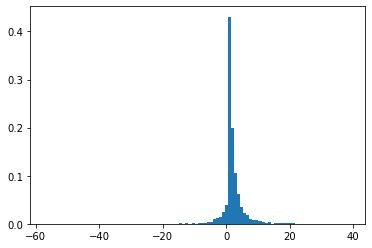

In [441]:
plt.hist(numbers, density=True, bins=100)
plt.show()

## A grammar for shapes

Instead of defining meanings ourselves, we can rely on already existing libraries, even if they were not meant to be used with a CFG. For instance, consider Python's 'turtle' library. The idea is very simple: Imagine a little turtle that moves around the screen according to certain instructions, and as it moves around it traces a line. Instructions are things like 'move forward', 'go around some of a circle', etc.

Here's an example to show you the syntax:

In [604]:
t.clearscreen()
t.initializeTurtle()
t.hideturtle()
t.color('black')
t.speed(13)
for i in range(20):
    t.forward(10)
    t.circle(20,60)
    t.right(90)
    t.forward(30)

Based on these movements, we can define a grammar that produces series of instructions and just use the meanings defined by the Turtle library:

In [5]:
grammar = {
    # always start with a drawing
    '<drawing>': [
        # a drawing can include a movement 
        # follows by a drawing (recursive!)
        (8, '\t<movement>\n<drawing>'),
        # at some point the drawing ends
        (1, '\tpass'),
    ],
    # a movement is basically a single instruction
    # so a drawing consists of a series of movements
    # Movements have two types of parameters,
    # namely: angles and distances
    '<movement>': [
        (1, 't.forward(<distance>)'),
        (1, 't.backward(<distance>)'),
        (1, 't.right(<angle>)'),
        (1, 't.left(<angle>)'),
        (1, 't.circle(<distance>,<angle>)')
    ],
    # hand-specify some distances
    '<distance>': [
        (1, '10'),
        (1, '20'),
        (1, '30'),
    ],
    # hand-specify some angles
    '<angle>': [
        (1, '30'),
        (1, '60'),
        (1, '90'),
        (1, '170')
    ]
}

Try to run this multiple times and note that sometimes the result is just empty or a straight line, and sometimes it is some interesting complex shapes:

In [21]:
# define the 'central' part of the instructions
instructions = complete('<drawing>', grammar)

# add some needed scaffolding
program = f"""
t.clearscreen()
t.initializeTurtle()
t.hideturtle()
t.color('black')
t.speed(13)
for i in range(20):
{instructions}
"""

exec(program)

In [23]:
print(program)


t.clearscreen()
t.initializeTurtle()
t.hideturtle()
t.color('black')
t.speed(13)
for i in range(20):
	t.circle(10,30)
	t.right(60)
	t.backward(30)
	t.right(30)
	t.backward(30)
	t.circle(20,60)
	t.right(30)
	pass



The point here is: each sentence in our grammar is a shape.

If we take the LoT hypothesis seriously, we can then think that shape concepts (squares, triangles, etc.) are encoded at the cognitive level as sentences in the geometric fragment of the LoT.

## A grammar for music

In [517]:
# define rate (don't worry about this!)
fs = 44100

Another fascinating domain of interest for cognitive science is that of sounds. Let's think of what a simple grammar for sounds could be like. We are going to need a way of defining notes given a frequency:

In [580]:
def defineNote(frequency, seconds, fs=44100):
    # seconds*sample_rate steps 
    # between 0 and seconds
    t = np.linspace(0, seconds, int(seconds * fs), False)
    # sine wave
    note = np.sin(frequency * t * 2 * np.pi)
    # Ensure that highest value is in 16-bit range
    audio = note * (2**15 - 1) / np.max(np.abs(note))
    # Convert to 16-bit data
    audio = audio.astype(np.int16)
    return audio

And a way of playing them:

In [513]:
IPython.display.Audio(
    # put note or notes here!
    defineNote(220, 1), 
    rate=fs, 
    autoplay=True
)

We'll also need a way of melting two notes, i.e. playing them together:

In [519]:
def melt(note1, note2):
    # if they are of different lengths,
    # pad the shorter one with 0s
    diff = len(note1) - len(note2)
    if diff < 0:
        note1 = np.concatenate((
            note1,
            np.zeros(-diff, dtype=int)
        ))
    elif diff > 0:
        note2 = np.concatenate((
            note2,
            np.zeros(diff, dtype=int)
        ))

    return note1 + note2

Test the function:

In [515]:
melted = melt(
    defineNote(220, 1),
    defineNote(440, 2)
)

IPython.display.Audio(
    melted, 
    rate=fs, 
    autoplay=True
)

And a way of appending one note to another one:

In [589]:
def successive(note1, note2):
    return np.concatenate((note1, note2))

Define each note in an octave, so we can call them by name:

In [468]:
freqs = {
    'A': 220,
    'Bb': 233.08,
    'B': 246.94,
    'C': 261.63,
    'Db': 277.18,
    'D': 293.66,
    'Eb': 311.13,
    'E': 329.63,
    'F': 349.23,
    'Gb': 369.99,
    'G': 392.00,
    'Ab': 415.30,
}

And finally collect all the primitive meanings we defined in a single dictionary, so that we can use it with `interpret` to get the meaning of each sentence produced by the grammar:

In [590]:
interpret = {
    **freqs,
    'defineNote': defineNote,
    'melt': melt,
    'successive': successive 
}

Now we are ready to define a very simple grammar of music:

In [582]:
soundGrammar = {
    '<tune>': [
        (2, '<note>'),
        (1, 'successive(<tune>, <tune>)'),
        (1, 'melt(<tune>, <tune>)')
    ],
    '<note>': [
        (1, 'defineNote(<freq>, <time>)')
    ],
    '<freq>': list(freqs.keys()),
    '<time>': [
        (2, '0.1'), 
        (1, '0.2'), 
        (1, '0.3'),
    ]
}

In [538]:
soundGrammar

{'<tune>': [(4, '<note>'),
  (1, 'successive(<tune>, <tune>)'),
  (1, 'melt(<tune>, <tune>)')],
 '<note>': [(1, 'defineNote(<freq>, <time>)')],
 '<freq>': ['A', 'Bb', 'B', 'C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab'],
 '<time>': [(2, '0.1'), (1, '0.2'), (1, '0.3')]}

Run this until you get something long that looks interesting! As in the geometric example above, some productions are very simple while others are very messy and complicated.

In [594]:
tune = complete('<tune>', soundGrammar)
print(tune)

successive(melt(successive(defineNote(Db, 0.1), defineNote(Gb, 0.1)), successive(successive(defineNote(A, 0.2), successive(defineNote(Gb, 0.3), defineNote(A, 0.1))), defineNote(D, 0.1))), successive(defineNote(Eb, 0.1), melt(successive(defineNote(D, 0.1), successive(defineNote(D, 0.3), defineNote(D, 0.2))), melt(successive(melt(defineNote(D, 0.3), defineNote(C, 0.2)), melt(defineNote(G, 0.1), defineNote(E, 0.1))), melt(defineNote(G, 0.1), defineNote(Gb, 0.3))))))


In [597]:
IPython.display.Audio(
    # put note or notes here!
    eval(tune, interpret), 
    rate=fs, 
    autoplay=True
)

This is not going to sound very good, possibly because the grammar is not encoding any of the interesting structure we like in music. 

> __QUESTION__ How do you think we could modify the grammar to make the productions more aesthetically pleasant / less 'messy' sounding?

## Homework

Second homework set! Here's the task: 
1. Pick a domain. You are free to pick the domain you want, but here are some ideas (in increasing complexity):
    - Polynomials: Each sentence produced by the grammar then is a polynomial function of one variable `x`. Polynomials have a fixed structure that can be described by a grammar & can be easily plotted with plt!
    - 2d polynomials: A polynomial function of two variables. It can be displayed as a surface. The only difference is that now you have two variables instead of just one. For plotting you can use e.g. [this plt function](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html).
    - Trees: this can be done in turtle, e.g. see [this example](https://stackoverflow.com/questions/39822733/turtle-and-draw-a-tree-with-transcrypt), but you need to be careful about lines going up, otherwise it's not a tree! :)
    - Towers (more ambitious)
        - Basically, blocks of different shapes and sizes (or just one shape and size to start with) put on top of each other.
        - Each sentence in the grammar would be a tower. Something like `place_on_top(position=0.5, bottomblock=block(h=2,w=3), topblock=block(h=3,w=2))` for a simple tower with two blocks.
        - The tricky thing is going to be to make sure you don't get overlapping blocks, or to find a good way of dealing with overlapping blocks. Some possible ways of dealing with this at the interpreter level: (1) whenever two blocks overlap, fuse them with each other, (2) if a block overlap with an already defined block, chop off the overlapping part, (3) if a block overlap with an already defined block, don't add the new proposed block but keep going.
        - Towers can be rendered visually with matplotlib
        - In fact, it shouldn't be too hard with [pymunk](http://www.pymunk.org/en/latest/) to run the time forward and see if you can get more stable towers / higher towers by picking the right grammar ;) 
        - Exploring this more could be a final project for instance!
        - See the code below for some initial scaffolding.
1. Write a grammar that produces descriptions of objects in that domain
    - Like the geometric grammar and the sound grammar above.
1. Write an interpreter for that grammar
    - Feel free to rely on pre-existing libraries for this if you'd like, like we did above with turtle.
1. Produce and interpret some sentences from the grammar and display some examples.
    - What it means to 'display' depends on the domain you chose. For instance, it can be a picture, an audio, or a video. But also just a number or something else!

In this lab we have seen how to do this for three domains (numbers, geometrical shapes, sounds), which should give you an idea of how it's done.

## (Optional: some initial code for tower grammar)

In [2]:
!pip install pymunk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.5/979.5 KB 7.6 MB/s eta 0:00:0000:0100:01


In [218]:
import pymunk
from pymunk import Vec2d
from IPython.display import HTML

I thought I would help you out if you decide to do the tower thing and animate it. Here's some useful objects:

In [326]:
def calculate_coords(block):
    """
    This function takes a pymunk's Body object
    and returns a list containing the current 
    position of its vertices in global coordinates
    """
    shape = list(block.shapes)[0]
    return [
        list(v.rotated(shape.body.angle) + shape.body.position)
        for v in shape.get_vertices()
    ]


class Tower:
    """
    This class models a tower, i.e. a bunch of blocks.
    We can add a new block with the function add_block
    """
    
    def __init__(self):

        ### Init pymunk and create space
        self.space = pymunk.Space()
        self.space.gravity = (0.0, -100)
        
        ### Add ground
        shape = pymunk.Segment(
            self.space.static_body, 
            (0, -1), 
            (10, -1), 
            1.0
        )
        shape.friction = 1.0
        self.space.add(shape)

    def add_block(self, pos, size, mass=1.):
        """
        Parameters
        ----------
        pos: tuple
            The (x,y) position of the center of the block
            NOTE: Center of mass is at local coordinate's (0,0)
        size: tuple
            Width and height of block respectively
        si
        """
        width, height = size
        # sequential edges of polygon 
        # in *local* coordinates
        vs = [(-width/2, -height/2), (width/2, -height/2), (width/2, height/2), (-width/2, height/2)]
        moment = pymunk.moment_for_poly(mass, vs, (0, 0))
        block = pymunk.Body(mass, moment)
        block.position = pos
        shape = pymunk.Poly(block, vs)
        shape.friction = 10
        self.space.add(block, shape)

    def loop(self):
        """
        Generates the successive positions of all blocks
        """
        fps = 30.0
        dt = 1.0 / fps / 5
        while True:
            self.space.step(dt)
            yield [
                calculate_coords(block) 
                for block in self.space.bodies
            ]

And the code for simulating the physical behaviour of the tower over time with plt:

In [321]:
import matplotlib.animation as anim
from matplotlib.patches import Polygon

def plot_cont(return_positions_f):
    y = []
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    def update(blocks_coords):
        ax.clear()
        for block_coords in blocks_coords:
            # print(block_coords)
            p = Polygon(
                block_coords, 
                edgecolor='k',
                facecolor='w'
            )
            ax.add_patch(p)
        ax.set_ylim(0,10)
        ax.set_xlim(0,10)

    a = anim.FuncAnimation(fig, update, frames=return_positions_f, repeat=False)
    return a

And finally let's check this with a simple example of an unstable tower:

In [327]:
tower = Tower()
tower.add_block([1,0.5], (1,1))
tower.add_block([1.55,1.5], (1,1))

In [328]:
%%capture
a = plot_cont(tower.loop)

In [329]:
HTML(a.to_html5_video())

# Bayes

In [28]:
import numpy as np
import matplotlib.pyplot as plt

## The Metropolis-Hastings algorithm

In the lecture this week, we have seen the _Metropolis-Hastings_ algorithm, which allows us to get samples from an _unnormalized_ distribution function, i.e., a function that returns a probability multiplied by some constant factor. Note that this can be any distribution (although in practice we will need it to get samples from an unnormalized posterior).

First of all, have a look at the description of the algorithm and try to implement it as described here.
> __**NOTE**__ You can find the implemented algo at the bottom of this notebook, but please try by yourself before looking at it!

In [ ]:
def mcmc(nsamples, unnorm_prob_f, proposalf, burnin=100, initial=0.):
    """
    Parameters
    ----------
    nsamples: int
        Number of samples to draw (includes burnin)
    unnorm_prob_f: func
        Function taking a point in the support and
        returning its unnormalized probability
    proposalf: func
        Function that takes current position
        and returns a proposal for where to move next
    burnin: int
        Number of initial samples to exclude
    initial: float or func
        If float, starts from that point.
        If func, starts from the output of initial()
    Returns
    -------
    list
        A list of samples
    """
    
    # set initial point in variable 'current' and 
    # calculate current probability ('curr_prob')
    # ADD CODE HERE
    
    # we put the samples in list 'states'
    states = []
    for i in range(nsamples):
        
        # append current position to states
        # ADD CODE HERE
        
        # proposes a new point
        # ADD CODE HERE
        
        # calculate unnormalized probability 
        # at proposed point
        # ADD CODE HERE
        
        # calculates probability of acceptance 
        # in variable 'acceptance'
        # ADD CODE HERE
        
        if np.random.random_sample() < acceptance:
            # if acceptance is higher than random btw 0 and 1,
            # accept move, else stay where you are (i.e. do nothing)
            # ADD CODE HERE
    
    # return list of samples
    return states[burnin:]

This algorithm has a lot of pros:
- Suprisingly simple to implement
- If we get enough samples it is guaranteed to converge to the true posterior!
- Works for both continuous and discrete parameter spaces
But it also has some cons:
- Can be very slow to converge
- Does not work well with highly dimensional spaces
- There is no way to tell if it converged to the true posterior

In general, we should get as many samples as possible and run multiple chains with different initial points, to see if they converged to the same distribution.

## Getting samples from an unnormalized normal distribution

The simplest application is to get samples from a distribution that we can calculate exactly, and see if the algorithm converges to it. Let's take the standard normal distribution, which has density function:

$$
\varphi (z)= \frac {1}{\sqrt {2\pi }} e^{-{\frac {z^{2}}{2}}}
$$

let's write a function to calculate this probability density:

In [34]:
def normal(x,mu=0,sigma=1):
    """
    Probability density of normal distribution at x
    """
    numerator = np.exp((-(x-mu)**2)/(2*sigma**2))
    denominator = sigma * np.sqrt(2*np.pi)
    return numerator/denominator

And let's test this function to make sure it does what we expect:

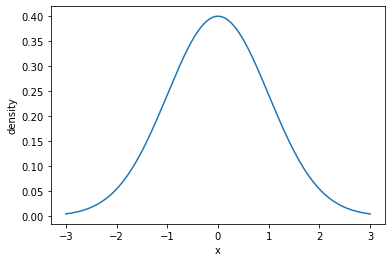

In [37]:
xs = np.linspace(-3,3,1000)
plt.plot(xs, normal(xs))
plt.xlabel('x')
plt.ylabel('density')
plt.show()

Now suppose that we didn't have the explicit formula for the distribution, but rather some black-box function where $\varphi$ is multiplied by an unknown constant $K$:

$$
\varphi' (z)= K \frac {1}{\sqrt {2\pi }} e^{-{\frac {z^{2}}{2}}}
$$

> __**NOTE**__: If $K$ is equal to the normalization constant $\sqrt {2\pi }$, $\varphi' (z)$ becomes just $e^{-{\frac {z^{2}}{2}}}$. This is essentially the trick we will use to sample from the posterior, where we don't have the posterior as such, but we can calculate the posterior multiplied by $P(D)$.

Now we can use our mcmc function above to take samples from the distribution:

In [39]:
samples = mcmc(
    # Number of samples
    100000,
    # Unnormalized density function
    lambda x: np.exp(-x**2 / 2),
    # Proposal function from point x
    lambda x: np.random.normal(loc=x, scale=0.1),
)

We can plot a histogram of the samples and compare it to the true distribution, and if you wrote the MCMC function correctly, they should look very close:

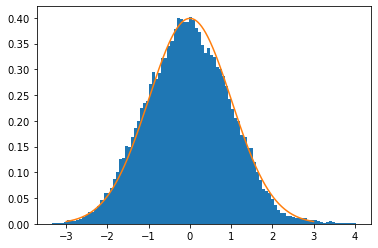

In [33]:
# plot a histogram of the samples
plt.hist(samples, bins=100, density=True)
# also plot the true distribution, just to be sure!
xs = np.linspace(-3,3,1000)
plt.plot(xs, normal(xs))
plt.show()

## Using MHMC for Bayesian inference: categorization in continuous space

Now recall the categorization case that we saw in class: we observe some samples from an unknown category, and we have to form a posterior over the position of the unseen category's boundaries. The case we have seen in class has discrete boundaries, and therefore we could in theory calculate the posterior directly: consider all the possible hypotheses (categories) $H$, calculate $P(H) P(D \mid H)$, and sum it all to find $P(D)$.

However, now imagine the case where we have a _continuous_ space, and so infinitely many categories. The probability density of sampling a certain observation from a category is still 0 if the observation lies outside the category and $1/|H|$ otherwise, but now the category $H$ can have a float size (e.g., category [-1, 0.5] has size 1.5). Now it becomes difficult to calculate the $P(D)$, because we can't easily integrate over all categories!

However, if we define some prior over hypotheses (i.e. the categories), we can still easily calculate the numerator of the posterior, namely $P(H) P(D \mid H)$, for specific categories. A simple prior can be defined as follows:

$$
p(H) = \phi(x=l_H, \mu=0, \sigma=10) \; \phi(x=u_H, \mu=0, \sigma=10)
$$

where $\phi$ is the probability density function of a normal distribution, $l_H$ is the lower bound, and $u_H$ is the upper bound. 

In [81]:
def prior_f(boundaries):
    lb, ub = boundaries
    return normal(lb, sigma=10) * normal(ub, sigma=10)

Likelihood can be defined as discussed above:

$$
p(D \mid H) = \prod_{d \in D} \left( |H|^{-1} \text{ if } d \in H \text{ else } 0 \right)
$$

where $D$ is a set of observations (points from the unobserved category).

In [80]:
def likelihood_f(data, boundaries):
    lb, ub = boundaries
    compatible = all([lb < i < ub for i in data])
    if compatible:
        return 1/(ub-lb)**len(data)
    else:
        return 0

With the prior and the likelihood as defined above, we can write a function that given some data returns the unnormalized posterior function (i.e. a function form a category to the unnormalized posterior probability of the category given the data):

In [80]:
def define_unnorm_posterior(data):
    def unnorm_posterior(boundaries):
        return (
            likelihood_f(data, boundaries) * 
            prior_f(boundaries)
        )
    return unnorm_posterior

Finally, we just need a proposal function that takes a current category and proposes a new one. The proposal function here does this by moving the category up or down and stretching it by some amount:

In [105]:
def proposal_f(current_boundaries):
    # transform boundaries linearly
    # (i.e., move up and down and stretch)
    shift = np.random.normal()
    # we want the stretch to be always positive
    # to preserve order of upper and lower bound
    # (otherwise all samples with wrong order would
    # have prob 0 in the likelihood function)
    # Moreover, a stretching by some value x
    # should be as likely as a contraction by x
    # To preserve symmetry!
    stretch = np.exp(np.random.normal())
    return shift + stretch*current_boundaries

Let's check the distribution of the upper and lower bounds of the proposals starting from category [-1,1]:

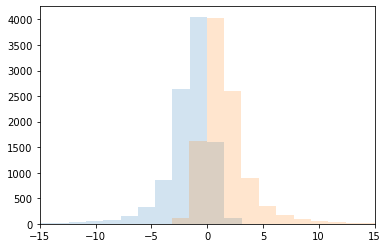

In [106]:
proposed = [proposal_f(np.array([-1,1])) for _ in range(10000)]
lbs, ubs = np.array(proposed).T
plt.hist(lbs, bins=100, alpha=0.2)
plt.hist(ubs, bins=100, alpha=0.2)
plt.xlim(-15, 15)
plt.show()

Now we are ready to run approximate Bayesian inference on some data! Let's define some data first:

In [71]:
observations = [0.1, 2., 1.1]

Take samples from the posterior distribution:

In [83]:
samples = mcmc(
    # Number of samples
    500000,
    # Unnormalized density function
    define_unnorm_posterior(observations),
    # Proposal function from point x
    proposal_f,
    initial=np.array([-0.5, 0.5])
)

/tmp/ipykernel_2721/2883728898.py:42: RuntimeWarning: invalid value encountered in double_scalars
  acceptance = min(move_prob/curr_prob,1)
/tmp/ipykernel_2721/2883728898.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  acceptance = min(move_prob/curr_prob,1)


Let's plot the posterior distributions of upper and lower bound:

In [85]:
lbs, ubs = np.array(samples).T

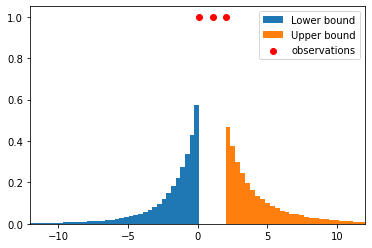

In [86]:
plt.hist(lbs, bins=100, density=True, label='Lower bound')
plt.hist(ubs, bins=100, density=True, label='Upper bound')
plt.xlim(-12, 12)
plt.scatter(
    observations, 
    [1.]*len(observations),
    color='red',
    label='observations'
)
plt.legend()
plt.show()

> __QUESTION__ What happens if we add more observations? Do you see the size effect in continuous space?

> __EXERCISE__ (if there is time left at the end) Write a version of this inference model for 2-d space, where categories are squares and observations are points in 2d space.

## Using MHMC in discrete spaces

We can use Metropolis-Hastings for discrete hypotheses spaces too! The basic idea is the same: we move around the space of hypotheses, calculating the unnormalized posterior for each point, and accepting new moves according to the rule described in the algo. The only complication is that we can't use the normal distribution centered at the current position as a proposal distribution, but we must come up with something different. 

As an example which will be useful in the future, consider the space of sentences generated by a PCFG as the space of hypotheses. For instance, the following PCFG:

$$
S \rightarrow a | b | Sa | Sb
$$

with uniform substitution probabilities (each $1/3$). The space of hypotheses then would be: 'a', 'b', 'aa', 'ab', 'ba', 'bb', and so on. 

In [132]:
def complete(incomplete_sentence):
    result = incomplete_sentence
    options = ['a', 'b', 'Sa', 'Sb']
    while 'S' in result:
        result = np.random.choice(options) + result[1:]
    return result

In [155]:
# test function
complete('Saa')

'aaa'

The probability of a specific sentence of length $n$ then is $4^{-n}$ (can you see why?). Let's verify by sampling a bunch of sentences and finding the proportion of times we sample each one:

In [175]:
n = 10000
samples = [complete('S') for _ in range(n)]
sentences, counts = np.unique(samples, return_counts=True)
argsort = np.argsort(counts)[::-1]
sentences = sentences[argsort]
counts = counts[argsort] / n

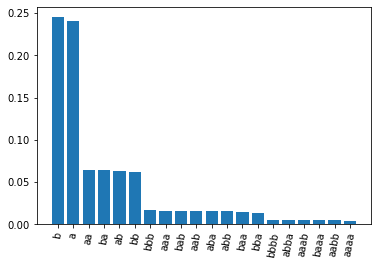

In [178]:
plt.bar(x=sentences[:20], height=counts[:20])
plt.xticks(rotation=80)
plt.show()

Based on this, it is easy to calculate the probability of each sentence:

In [109]:
def prior_f(sentence):
    return 4**(-len(sentence))

In [112]:
# example of prior calculation
prior_f('a')

0.25

We want to learn the sentence that produces some data. If we can see the sentence directly, this is easy: just look at the sentence and we're done. However, suppose that we can't see the sentence directly, but we see a 'noisy' version of it, where possibly some characters have been added at the end, where:
- nothing is added with probability 1/3.
- 'a' and 'b' are added with probability 1/3 each.

We can calculate the resulting observation probability:

In [128]:
def likelihood_f(observations, sentence):
    likelihood = 1
    for observation in observations:
        # Calculates probability of observation given true sentence
        if observation == sentence:
            likelihood *= 1/3
        elif observation.startswith(sentence):
            likelihood *= 1/3**(len(observation)-len(sentence))
        else:
            return 0
    return likelihood

In [130]:
# test the function
print(likelihood_f(['abaa', 'abaaa', 'aba'], 'ab'))
print(likelihood_f(['abaa', 'abaaa', 'abab'], 'ab'))
print(likelihood_f(['abaa', 'abaaa', 'abab'], 'abb'))

0.001371742112482853
0.00045724737082761767
0


Like in the example above, we can now calculate the unnormalized posterior:

In [194]:
def define_unnorm_posterior(data):
    def unnorm_posterior(sentence):
        return (
            likelihood_f(data, sentence) * 
            prior_f(sentence)
        )
    return unnorm_posterior

Finally, we need a proposal distribution, which brings us from a current sentence to a possible next step. For MHMC to work as written above, it has to be the case that the probability of going from $x$ to $x'$ is the same as the probability of going from $x'$ to $x$. If this is not the case, we need to multiply the value of `acceptance` in `mcmc` by $\frac{P(x' \rightarrow x) }{ P(x \rightarrow x')}$ to balance things out.

In practice, we will use the _subtree-regeneration_ transition distribution proposed at p.153 in Goodman, Noah D., Joshua B. Tenenbaum, Jacob Feldman, and Thomas L. Griffiths. “A Rational Analysis of Rule-Based Concept Learning.” Cognitive Science 32, no. 1 (2008): 108–54. https://doi.org/10.1080/03640210701802071. It works as follows, starting from current sentence $x$:
- Sample a node $n$ at random from the parse tree of $x$
- Remove everything below $n$ and replace $n$ with appropriate non-terminal, generating a tree $y$ containing non-terminals.
- Complete $y$ with the PCFG, obtaining new sentence $x'$.
- The acceptance probability from `mcmc` then gets additionally multiplied by:

\begin{align}
\frac{p(x' \rightarrow x)}{p(x \rightarrow x')} 
&= 
\frac{ P(\text{sampling node $n$ from $x'$}) }{ P(\text{sampling node $n$ from $x'$}) } 
\frac{ P(x \mid \text{PCFG}) }{ P(x' \mid \text{PCFG}) } \\
&= \frac{|x'|^{-1}}{|x|^{-1}} \frac{4^{-|x|}}{4^{-|x'|}} \\
&= \frac{|x|}{|x'|} \frac{4^{-|x|}}{4^{-|x'|}}
\end{align}


In [181]:
def transition_f(current):
    n = np.random.randint(len(current))
    truncated = 'S' + current[:n]
    return complete(truncated)

In [188]:
# test the function
transition_f('aba')

'bbb'

In [192]:
def acceptance_f(current, proposed, unnorm_prob_f):
    move_when_lower = (
        (unnorm_prob_f(proposed) * len(current) * 0.25**len(current))
        /
        (unnorm_prob_f(current) * len(proposed) * 0.25**len(proposed))
    )
    return min(
        move_when_lower,
        1
    )

In [193]:
def mcmc(nsamples, unnorm_prob_f, proposalf, burnin=100, initial=0.):
    """
    Same as mcmc above but with different acceptance_f
    """
    
    current = initial() if callable(initial) else initial
    curr_prob = unnorm_prob_f(current)
    states = []
    for i in range(nsamples):
        states.append(current)
        movement = proposalf(current)
        move_prob = unnorm_prob_f(movement)
        acceptance = acceptance_f(
            current, 
            movement,
            unnorm_prob_f
        )
        if np.random.random_sample() < acceptance:
            current = movement
            curr_prob = move_prob
    return states[burnin:]

Define some observations:

In [196]:
observations = ['aabaab', 'aaba', 'aabaaaa']

Take samples with our algorithm:

In [198]:
samples = mcmc(
    100000,
    define_unnorm_posterior(observations),
    transition_f,
    initial='a'
)

Plot the posterior distribution:

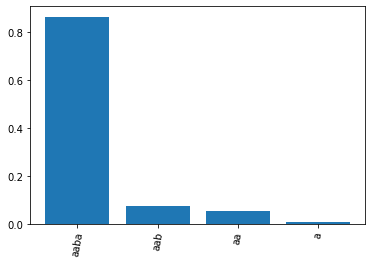

In [204]:
sentences, counts = np.unique(samples, return_counts=True)
argsort = np.argsort(counts)[::-1]
sentences = sentences[argsort]
counts = counts[argsort] / len(samples)

plt.bar(x=sentences, height=counts)
plt.xticks(rotation=80)
plt.show()

Various things to be noticed:
- The most likely sentence is the longest sentence that all the observations share, namely 'aaba'
- The second most likely is 'aab', because it would be a 'suspicious' coincidence if all observations independently produced an 'a' right after 'aab', if the true sentence is indeed 'aab'.
- Same, but even more so, applies to 'aa' and 'a'.
- So even though 'aaba' is a priori less likely than 'a', it get a higher posterior probability because of the likelihood!

## Homework

Third (and last) homeworks set! Consider the following CFG (interpret it as a PCFG with uniform probabilities), where each sentence from this grammar is an integer:
$$
S \rightarrow 1 | S+1 | S-1
$$
Note that there are multiple way to arrive at the same integer. E.g. $I(1+1-1)=I(1)$.

1. Write a function `prior_f` that takes a sentence produced by the PCFG and returns its probability in the PCFG.

Assume that there is a true (unknown) sentence $H$ that we are trying to infer based on some observations ${o_1, \dots, o_n}$. The observations aren't just the integer defined by the sentence, but rather each observation is equal to the integer defined by the sentence plus some normally distributed noise. The likelihood function therefore is as follows:
$$
p(o \mid H) = \phi(x= o-I(H), \mu=0, \sigma=2.)
$$
as usual, $I$ is the interpretation function, $\phi$ is the density function of the normal distribution. For instance if the true sentence was `1+1`, we might observe 1.94.

2. Write a function `likelihood_f` that calculates the probability of a list of observations given a sentence.
> __HINT__ First find the integer $i$ defined by the sentence, then for each observation find the difference between $i$ and the observation, then find the probability of those differences (given that they are samples from a normal with $\mu=0$ and $\sigma=2$), and multiply those probabilities together.
3. Write a function to calculate the unnormalized posterior. This is essentially what the `define_unnorm_posterior` function above does.

4. Write a transition function: a function that takes a current sentence $x$ and returns a randomly generated proposal $x'$. You can modify the subtree-regeneration above to adapt it to this case.
5. Using mcmc, draw 100000 samples from $P(H \mid D)$.

## Implemented MHMC

In [35]:
def mcmc(nsamples, unnorm_prob_f, proposalf, burnin=100, initial=0.):
    """
    Parameters
    ----------
    nsamples: int
        Number of samples to draw (includes burnin)
    unnorm_prob_f: func
        Function taking a point in the support and
        returning its unnormalized probability
    proposalf: func
        Function that takes current position
        and returns a proposal for where to move next
    burnin: int
        Number of initial samples to exclude
    initial: float or func
        If float, starts from that point.
        If func, starts from the output of initial()
    Returns
    -------
    list
        A list of samples
    """
    
    current = initial() if callable(initial) else initial
    curr_prob = unnorm_prob_f(current)
    
    # we put the samples in list 'states'
    states = []
    for i in range(nsamples):
        
        # append current position to states
        states.append(current)
        
        # proposes a new point
        movement = proposalf(current)
        
        # calculate unnormalized probability 
        # at proposed point
        move_prob = unnorm_prob_f(movement)
        
        # calculates probability of acceptance
        acceptance = min(move_prob/curr_prob,1)
        
        # if acceptance is higher than random btw 0 and 1,
        # accept move, else stay where you are (i.e. do nothing)
        if np.random.random_sample() < acceptance:
            current = movement
            curr_prob = move_prob
    
    # return list of samples
    return states[burnin:]